
<h1><b><center>Programming Assignment II : </center></b></h1>
<h1><b><center>Metropolis Hastings Algorithm</center></b></h1>
<h5><b><center> Amatya Sharma </center></b></h5>
<h5><b><center> 17CS30042 </center></b></h5>

## Dependencies and Variables : 
- n := number of iterations of algorithm
- K := number of bivariate gaussians for the mixture distribution 
- sigma := standard deviation for stepping normal distribution
- accepted := points accepted by metropolis hastings algo
- rejected := pts rejected by metropolis algo
- samples := pts sampled by metroplois algo
- rv[i] := ith Gaussian distribution
- mu[i] := mean of rv[i]
- cov[i] := covariance of rv[i]
- x1 := 1st element of bivariate gaussian
- x2 := 2nd element of bivariate gaussian



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal
import seaborn as sns
import math

## Metropolis Algorithm

In [2]:
x=np.random.multivariate_normal([2,3], [[math.sqrt(1)/2,0],[0,math.sqrt(1)/2]]).T
print(x)

[0.69830179 3.38973668]


In [3]:
def metropolis_hastings(p, n, sigma):
    x, y = np.random.multivariate_normal([2,3], [[math.sqrt(1)/2,0],[0,math.sqrt(1)/2]]).T
    samples = np.zeros((n,2))  # has all the walk points both rej and acc
    accepted = []  # only new walk points
    rejected = []  # if no change has happended, predicteed pts xstar and ystar go to rej
    
    for i in range(n): # perform for n iterations
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=(sigma), size = 2)
        # sample a move such that d(x) ~ N(0,sigma)
        u=np.random.uniform(0,1)
        if u < p(x_star, y_star) / p(x, y): # accept and move to new pt
            x, y = x_star, y_star
            accepted.append(np.array([x, y]))
        else :  # reject
            rejected.append(np.array([x_star, y_star]))
        samples[i] = np.array([x, y])
    return np.array(accepted), np.array(rejected), np.array(samples)

# Visualizing data

In [4]:
def visualize_data(rejected, samples, n, sigma, K):
    print("Visualized Data on (n, sigma, K):", n, sigma, K)
    plt.plot(rejected[:,0], rejected[:,1], 'rx', label = "Rejected", color = "red")
    plt.plot(samples[:,0], samples[:,1], label = "Walk")
    plt.title("Walk of Metropolis Algorithm")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid()
    plt.show()
    
    print("\n First Direction Plot against no. of iters:\n")
    iters=[i for i in range(1,n+1)]
    #print(yt)
    plt.plot(iters,samples[:,0])
    plt.xlabel('Iterations')
    plt.ylabel('%xdel1')
    plt.show()

    print("\n First Direction Frequency Plot against no. of iters:\n")
    plt.hist(samples[:,0],100)
    plt.xlabel('x1')
    plt.ylabel('Frequency of samples')
    plt.show()

    print("Sampled Points:\n")
    sns.jointplot(samples[:, 0], samples[:, 1])
    return


# Building DataSet 
We are required to form a mixture bivariate gaussian distribution (with K components)

In [5]:
def usr_in():
    n = int(input("n - "))
    K = int(input("K - "))
    sigma = float(input("sigma - "))
    return n, K, sigma

In [6]:
def run_algo(n, K, sigma):
  # prepare position coordinates 
  # these are just used to visualize data
  # no use in forming distibutions
  x, y = np.mgrid[0:3*K:.1, 0:4*K:.1]
  pos = np.dstack((x,y))

  # create k bivariate gaussians with required means and covariances
  rv = {}
  mx = np.zeros(np.shape(x))
  i = 1
  mu =[]
  cov =[]
  while i<=K:
      mui = [2*i, 3*i]
      sigmai = np.eye(2)*0.5*np.sqrt(i)
      rv[i] = multivariate_normal(mui, sigmai)
      mx = np.add( mx, rv[i].pdf(pos) )
      plt.contour(x,y,rv[i].pdf(pos))
      mu.append(mui)
      cov.append(sigmai)
      i+=1

  def mixture_GM_pdf(x1, x2):
    i = 1
    mx = 0.0
    while i<=K:
      mx += rv[i].pdf([x1,x2])
      i += 1
    mx = mx/K
    return mx

  plt.title("Uniform Mixture Gaussian")
  plt.contour(x,y,mx)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.show()

  accepted, rejected, samples = metropolis_hastings(mixture_GM_pdf, n, sigma)

  visualize_data(rejected, samples, n, sigma, K)

  return

# Run 1 of Algorithm
- $n$ = 1000
- $K$ = 5
- $sigma$ = 0.5

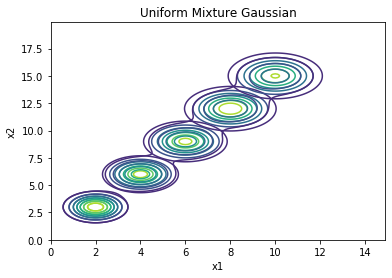

Visualized Data on (n, sigma, K): 1000 0.5 5


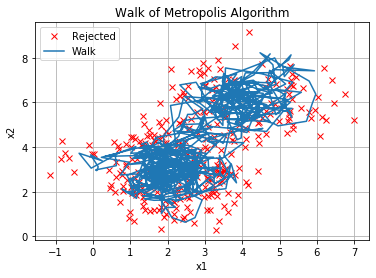


 First Direction Plot against no. of iters:



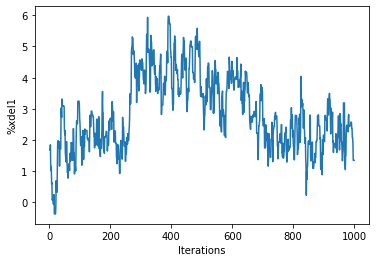


 First Direction Frequency Plot against no. of iters:



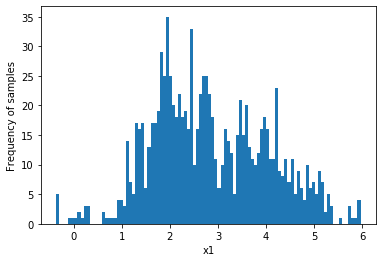

Sampled Points:



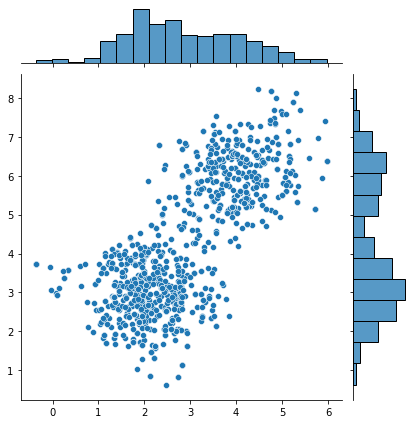

In [7]:
run_algo(1000, 5, 0.5)

# Run 2 of Algorithm
- $n$ = 100
- $K$ = 1
- $sigma$ = .5

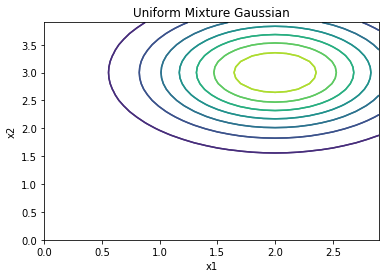

Visualized Data on (n, sigma, K): 100 0.5 1


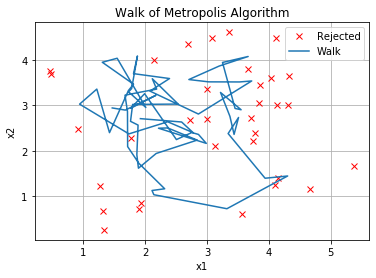


 First Direction Plot against no. of iters:



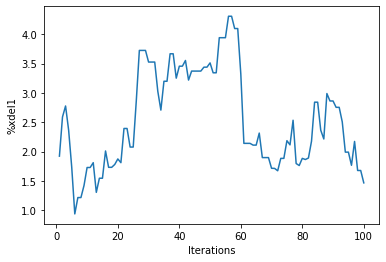


 First Direction Frequency Plot against no. of iters:



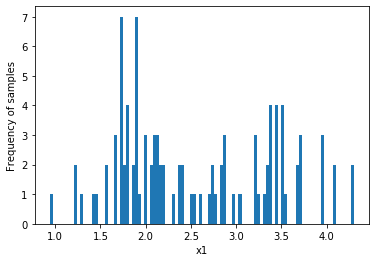

Sampled Points:



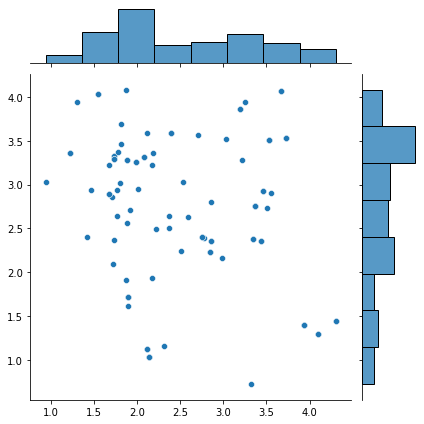

In [8]:
run_algo(100, 1, .50)

# Run 3 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = 1.0

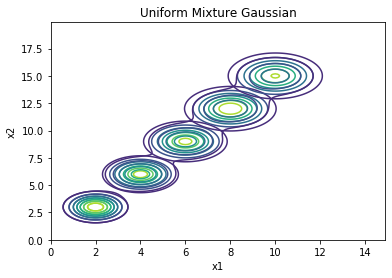

Visualized Data on (n, sigma, K): 100 1.0 5


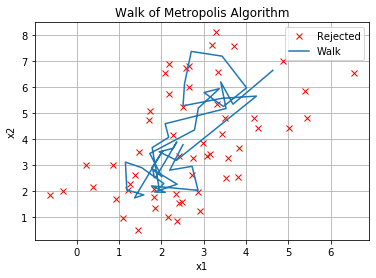


 First Direction Plot against no. of iters:



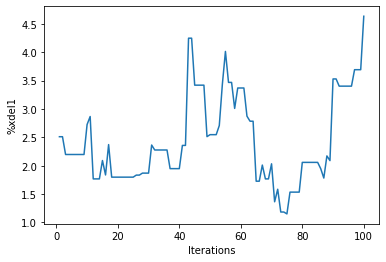


 First Direction Frequency Plot against no. of iters:



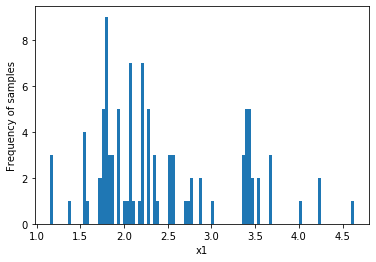

Sampled Points:



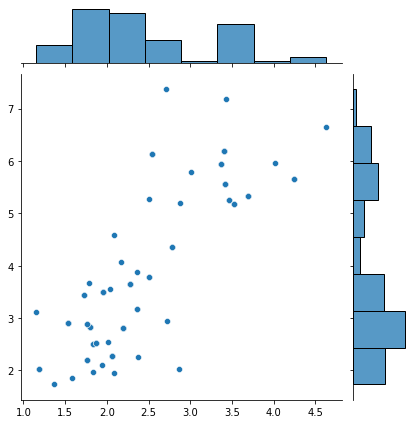

In [21]:
run_algo(100, 5, 1.0)

# Run 4 of Algorithm
- $n$ = 100
- $K$ = 10
- $sigma$ = .5

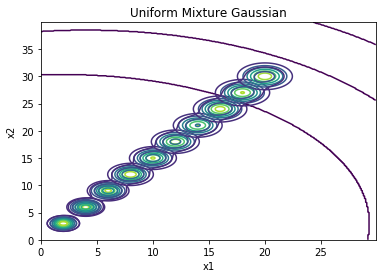

Visualized Data on (n, sigma, K): 100 0.5 10


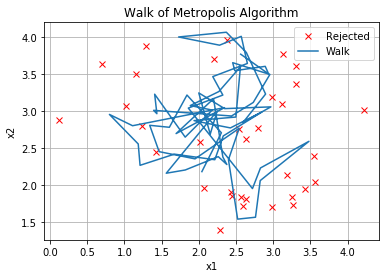


 First Direction Plot against no. of iters:



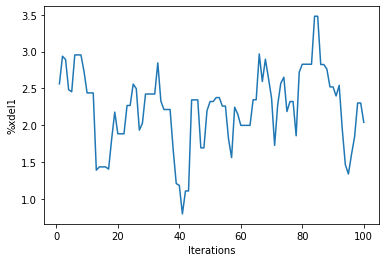


 First Direction Frequency Plot against no. of iters:



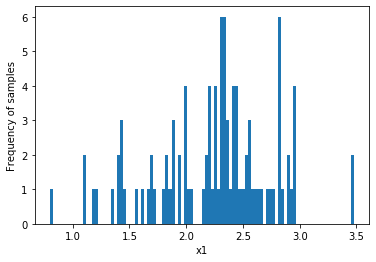

Sampled Points:



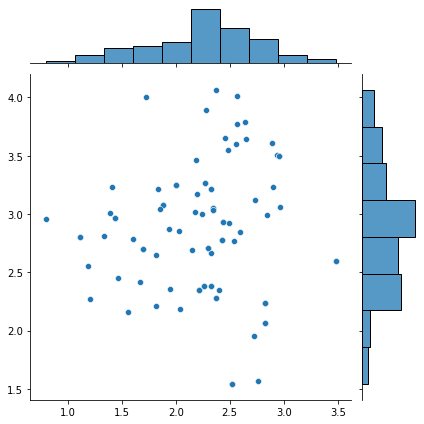

In [10]:
run_algo(100, 10, .5)

# Run 5 of Algorithm 
- $n$ = 100
- $K$ = 20
- $sigma$ = .5

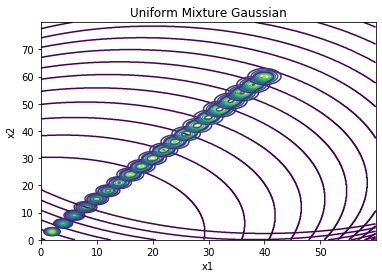

Visualized Data on (n, sigma, K): 100 0.5 20


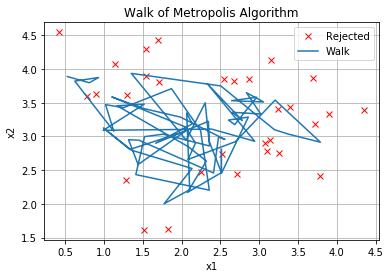


 First Direction Plot against no. of iters:



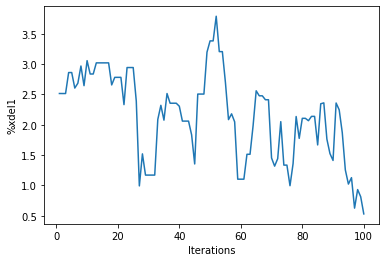


 First Direction Frequency Plot against no. of iters:



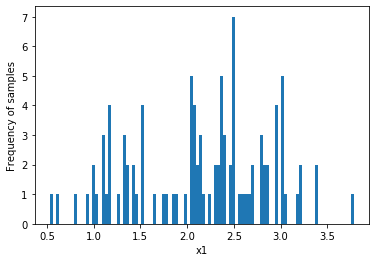

Sampled Points:



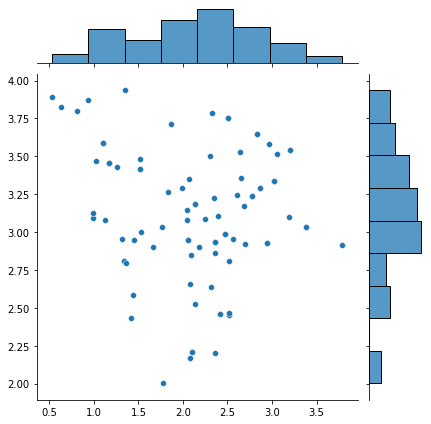

In [11]:
run_algo(100, 20, .5)

# Run 6 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = 0.01

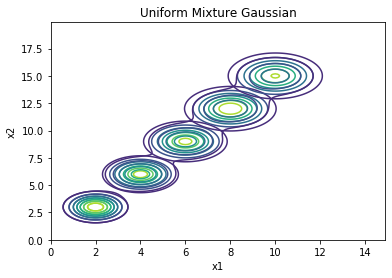

Visualized Data on (n, sigma, K): 100 0.1 5


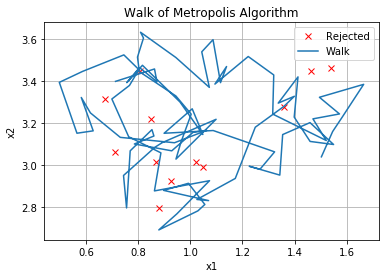


 First Direction Plot against no. of iters:



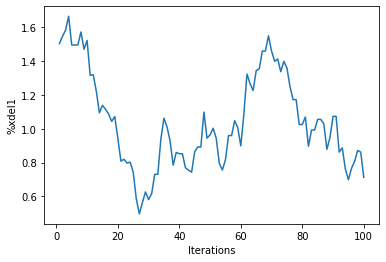


 First Direction Frequency Plot against no. of iters:



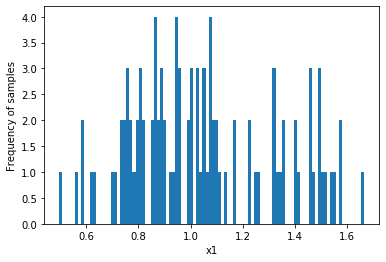

Sampled Points:



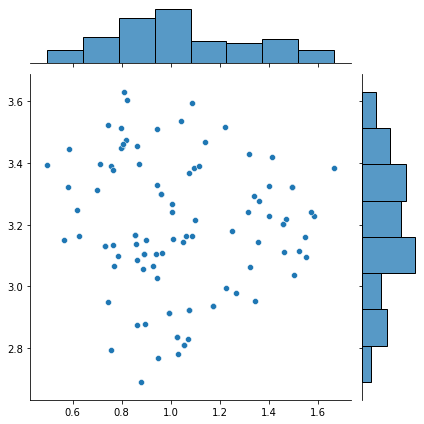

In [12]:
run_algo(100, 5, 0.1)

# Run 7 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = .75

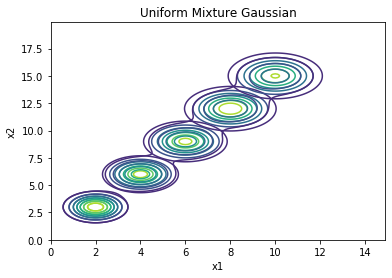

Visualized Data on (n, sigma, K): 100 0.75 5


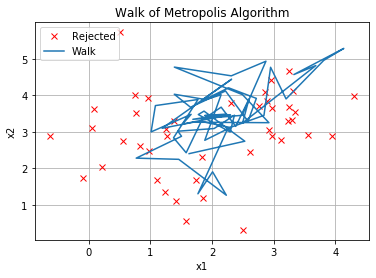


 First Direction Plot against no. of iters:



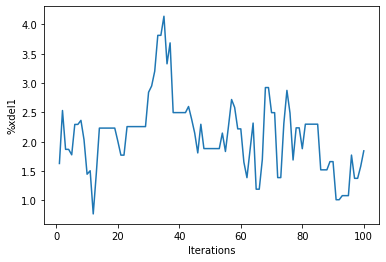


 First Direction Frequency Plot against no. of iters:



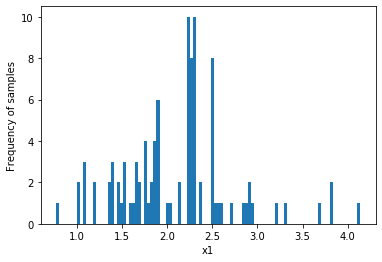

Sampled Points:



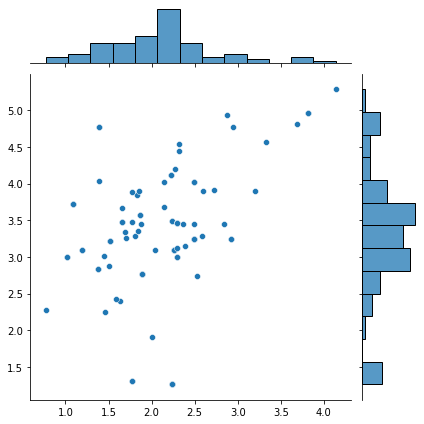

In [13]:
run_algo(100, 5, 0.75)

# Run 8 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = 2.0

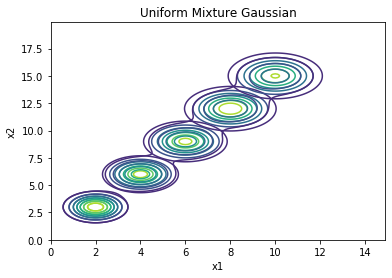

Visualized Data on (n, sigma, K): 100 2.0 5


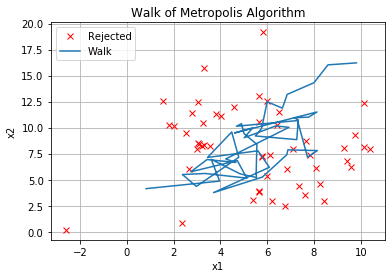


 First Direction Plot against no. of iters:



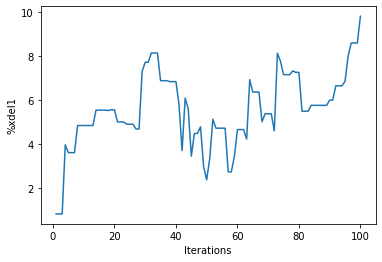


 First Direction Frequency Plot against no. of iters:



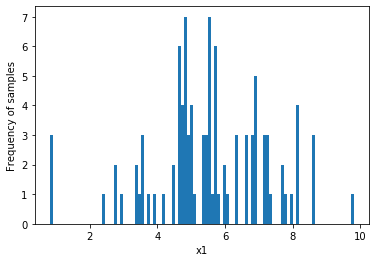

Sampled Points:



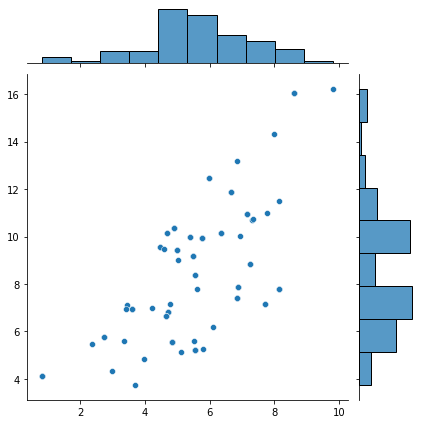

In [14]:
run_algo(100, 5, 2.0)

# Run 9 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = 4.0

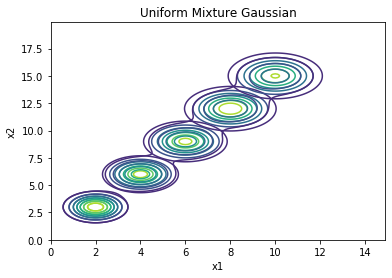

Visualized Data on (n, sigma, K): 100 4.0 5


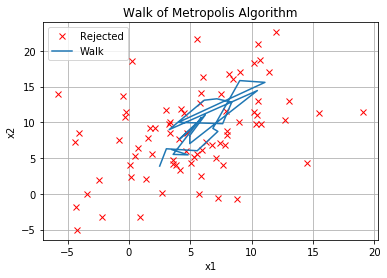


 First Direction Plot against no. of iters:



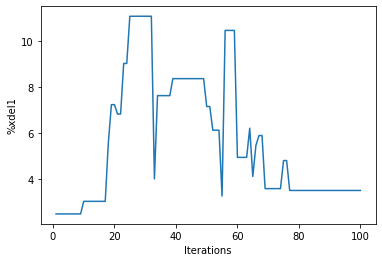


 First Direction Frequency Plot against no. of iters:



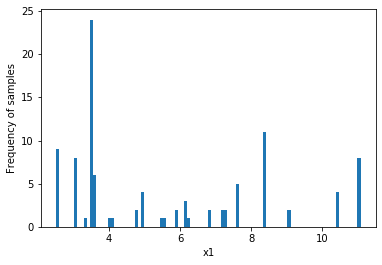

Sampled Points:



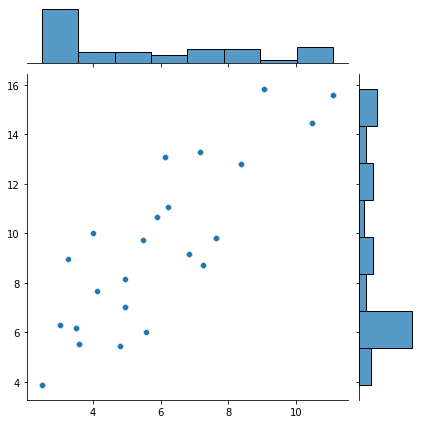

In [15]:
run_algo(100, 5, 4.0)

# Run 10 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = 4.5

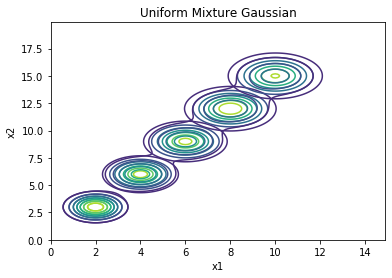

Visualized Data on (n, sigma, K): 100 4.5 5


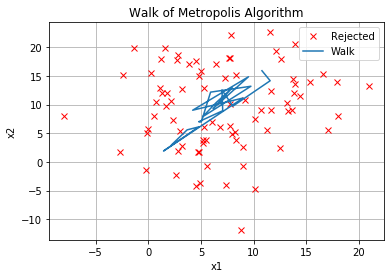


 First Direction Plot against no. of iters:



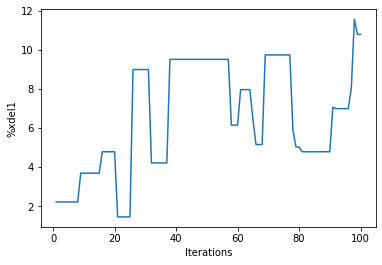


 First Direction Frequency Plot against no. of iters:



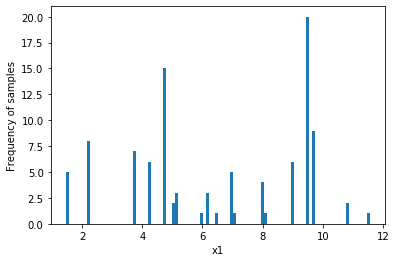

Sampled Points:



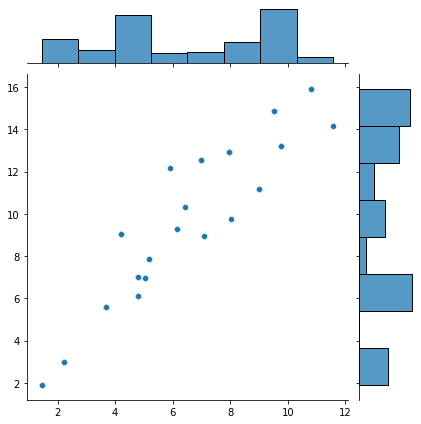

In [16]:
run_algo(100, 5, 4.5)

# Run 11 of Algorithm
- $n$ = 100
- $K$ = 5
- $sigma$ = 5

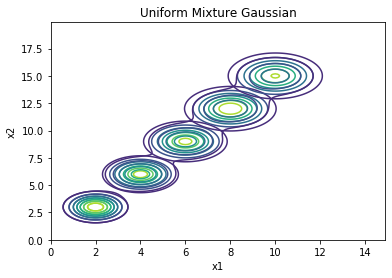

Visualized Data on (n, sigma, K): 100 5.0 5


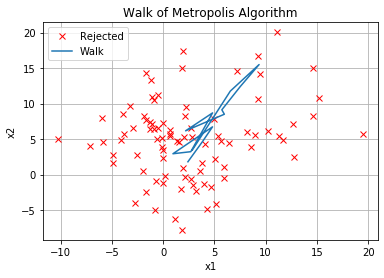


 First Direction Plot against no. of iters:



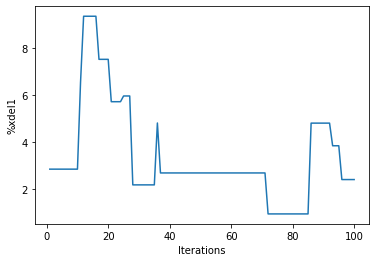


 First Direction Frequency Plot against no. of iters:



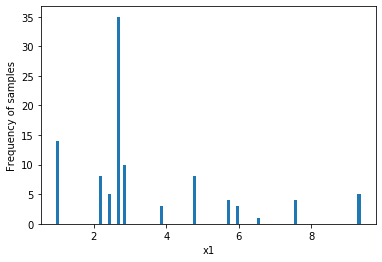

Sampled Points:



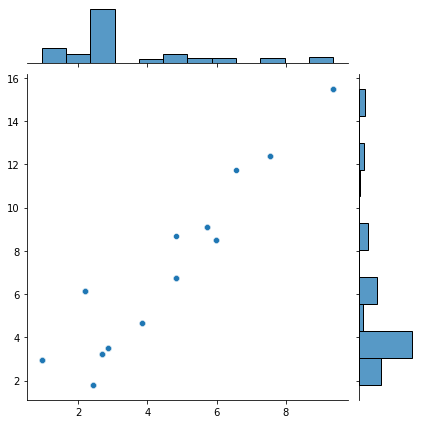

In [17]:
run_algo(100, 5, 5.0)

# Run 12 of Algorithm
- $n$ = user-defined
- $K$ = user-defined
- $sigma$ = user-defined


n - 1000
K - 5
sigma - 1.375


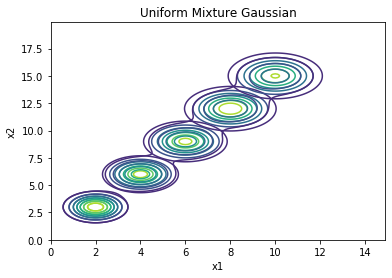

Visualized Data on (n, sigma, K): 1000 1.375 5


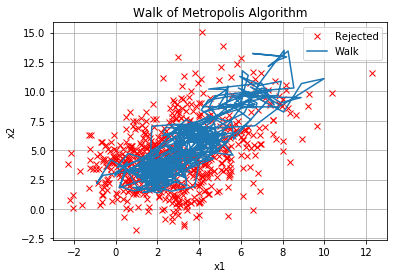


 First Direction Plot against no. of iters:



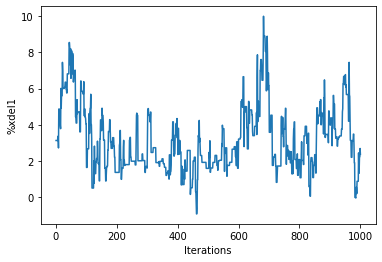


 First Direction Frequency Plot against no. of iters:



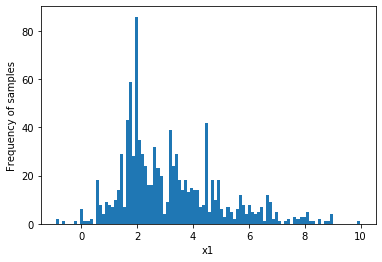

Sampled Points:



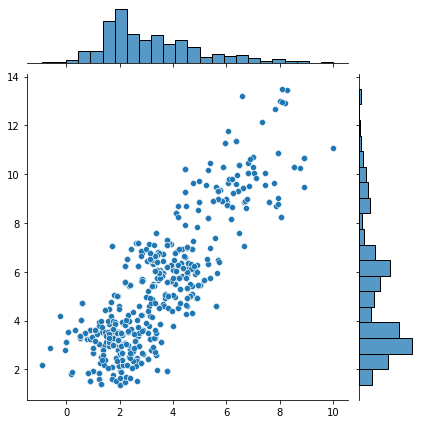

In [18]:
n1, K1, sigma1 = usr_in()
run_algo(n1, K1, sigma1)